### Paralelización trivial con threads

Ese ejemplo evoluciona un gran número de ecuaciones independientes donde solo hay un cambio en un parámetro externo propio de cada ecuación y elejido al azar en el intervalo $[0,2\pi]$

El sistema es:

$$
\frac{dy_j}{dt} = f(y_j,t,a_j) = i*a_j*y_j + \sin(2\pi t)
$$

Para la evolución temporal y por simplicidad usamos Euler.

In [2]:
using Base.Threads
using BenchmarkTools
using Plots

In [3]:
n_threads = nthreads()

10

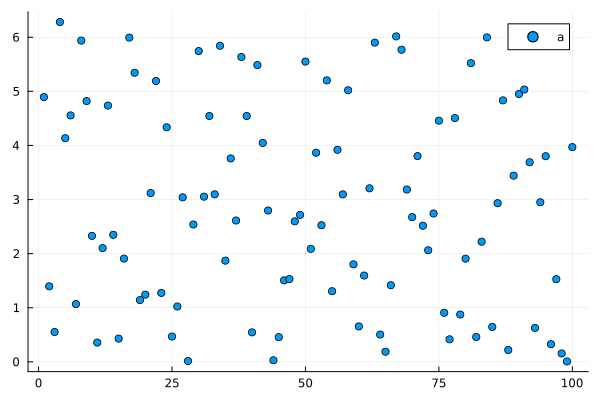

In [4]:
N = 100
M = 100

a = 2π*rand(N)

scatter(a, label="a")

In [5]:

function f(y,t,a)
    return  im*a.*y .+ sin(2π*t)
end

dt = 0.01
t = zeros(M)
y = ones(ComplexF64,N,M)

for j in 2:M
    t[j] = t[j-1] + dt
    @threads for i in 1:N
        y[i,j] = y[i,j-1] + f(y[i,j-1],t[j-1],a[i])*dt
    end
end


┌ Info: Saved animation to /home/reula/Julia/jupyter-ccad/anim_fps5.gif
└ @ Plots /home/reula/.julia/packages/Plots/tDI0A/src/animation.jl:156


Plots.AnimatedGif("/home/reula/Julia/jupyter-ccad/anim_fps5.gif")
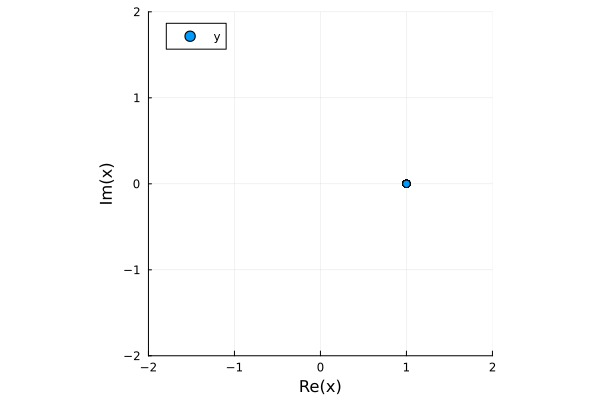

In [6]:
anim = @animate for j in 1:M
    scatter(y[:,j], label="y", aspect_ratio=:equal, legend=:topleft, xlim=(-2,2), ylim=(-2,2))
end

gif(anim, "anim_fps5.gif", fps = 5)

In [7]:
function evolve(f,y,t,a,dt)   
    for j in 2:M
        t[j] = t[j-1] + dt
        @threads for i in 1:N
            y[i,j] = y[i,j-1] + f(y[i,j-1],t[j-1],a[i])*dt
        end
    end
    return y[:,:], t[:]
end

evolve (generic function with 1 method)

In [8]:
@btime evolve(f,y,t,a,dt)

  1.465 ms (6749 allocations: 773.27 KiB)


(ComplexF64[1.0 + 0.0im 1.0 + 0.04893605473973841im … -0.31957730134677176 - 1.4838863301981466im -0.2482150910002887 - 1.49952518251043im; 1.0 + 0.0im 1.0 + 0.013959308530851595im … 0.07460138798732438 + 1.1609496729962427im 0.05714200097753556 + 1.1619910567879876im; … ; 1.0 + 0.0im 1.0 + 7.735798072405994e-5im … 1.0018483671652976 + 0.008811594035116778im 1.000594353182533 + 0.008889095001792382im; 1.0 + 0.0im 1.0 + 0.039687888456969835im … -1.2745244480115876 - 0.8742653760025765im -1.2410800336226495 - 0.9248485601309414im], [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09  …  0.9000000000000006, 0.9100000000000006, 0.9200000000000006, 0.9300000000000006, 0.9400000000000006, 0.9500000000000006, 0.9600000000000006, 0.9700000000000006, 0.9800000000000006, 0.9900000000000007])

In [9]:
function evolve_sf(f,y,t,a,dt)   
    for j in 2:M
        t[j] = t[j-1] + dt
        y[:,j] = y[:,j-1] + f(y[:,j-1],t[j-1],a[:])*dt
    end
    return y[:,:], t[:]
end

evolve_sf (generic function with 1 method)

In [10]:
@btime evolve_sf(f,y,t,a,dt)

  204.561 μs (3668 allocations: 1.32 MiB)


(ComplexF64[1.0 + 0.0im 1.0 + 0.04893605473973841im … -0.31957730134677176 - 1.4838863301981466im -0.2482150910002887 - 1.49952518251043im; 1.0 + 0.0im 1.0 + 0.013959308530851595im … 0.07460138798732438 + 1.1609496729962427im 0.05714200097753556 + 1.1619910567879876im; … ; 1.0 + 0.0im 1.0 + 7.735798072405994e-5im … 1.0018483671652976 + 0.008811594035116778im 1.000594353182533 + 0.008889095001792382im; 1.0 + 0.0im 1.0 + 0.039687888456969835im … -1.2745244480115876 - 0.8742653760025765im -1.2410800336226495 - 0.9248485601309414im], [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09  …  0.9000000000000006, 0.9100000000000006, 0.9200000000000006, 0.9300000000000006, 0.9400000000000006, 0.9500000000000006, 0.9600000000000006, 0.9700000000000006, 0.9800000000000006, 0.9900000000000007])

In [14]:
N = 1_000_000
a_l = 2π*rand(N)
y_l = ones(ComplexF64,N,M)
t_l = zeros(M);


In [12]:

@btime evolve(f,$y_l,$t_l,$a_l,dt)


  269.931 ms (6903 allocations: 1.49 GiB)


(ComplexF64[1.0 + 0.0im 1.0 + 0.009929132758770711im … 0.497981543319353 + 0.9700506708055404im 0.4870964490905472 + 0.9749951956605758im; 1.0 + 0.0im 1.0 + 0.03946292266003882im … -1.2897637953396992 - 0.8504440480911204im -1.2574561199788319 - 0.901341896996329im; … ; 1.0 + 0.0im 1.0 + 0.03655552507541684im … -1.4400444225733304 - 0.5195021439048026im -1.4223070812607286 - 0.5721437239038962im; 1.0 + 0.0im 1.0 + 0.05236630273415038im … 0.11198524888707165 - 1.4779201409598568im 0.1881251300698307 - 1.4720558875148773im], [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09  …  0.9000000000000006, 0.9100000000000006, 0.9200000000000006, 0.9300000000000006, 0.9400000000000006, 0.9500000000000006, 0.9600000000000006, 0.9700000000000006, 0.9800000000000006, 0.9900000000000007])

In [13]:
@btime evolve_sf(f,$y_l,$t_l,$a_l,dt)


  1.283 s (4361 allocations: 11.08 GiB)


(ComplexF64[1.0 + 0.0im 1.0 + 0.009929132758770711im … 0.497981543319353 + 0.9700506708055404im 0.4870964490905472 + 0.9749951956605758im; 1.0 + 0.0im 1.0 + 0.03946292266003882im … -1.2897637953396992 - 0.8504440480911204im -1.2574561199788319 - 0.901341896996329im; … ; 1.0 + 0.0im 1.0 + 0.03655552507541684im … -1.4400444225733304 - 0.5195021439048026im -1.4223070812607286 - 0.5721437239038962im; 1.0 + 0.0im 1.0 + 0.05236630273415038im … 0.11198524888707165 - 1.4779201409598568im 0.1881251300698307 - 1.4720558875148773im], [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09  …  0.9000000000000006, 0.9100000000000006, 0.9200000000000006, 0.9300000000000006, 0.9400000000000006, 0.9500000000000006, 0.9600000000000006, 0.9700000000000006, 0.9800000000000006, 0.9900000000000007])